# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 10
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 17.121s 


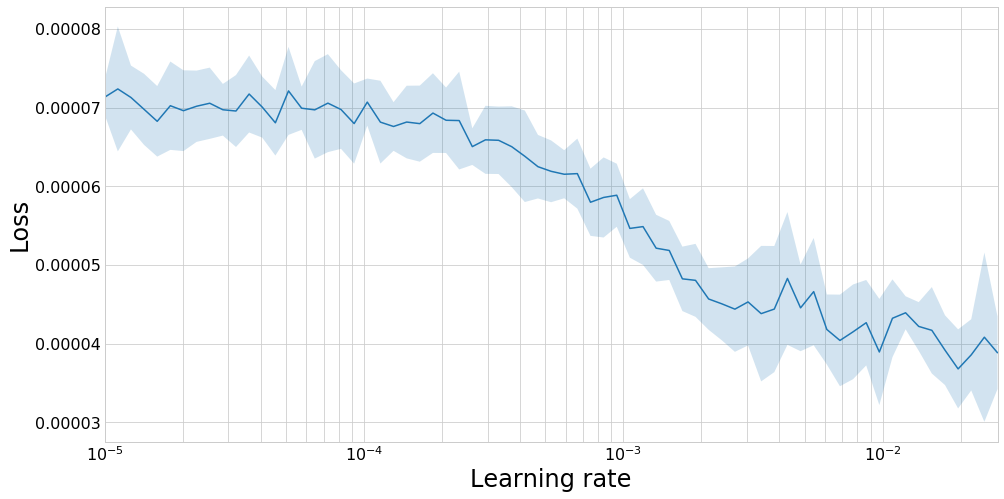

______________________________________



In [6]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [7]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'LinearCLR':{'reverse':False, 'max_lr':2e-3, 'min_lr':2e-4, 'scale':2},
                 'SWA':{'renewal':5, 'sgd_replacement':False, 'start':1},}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using linear LR cycle
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266325). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133536). Check your callbacks.
  % delta_t_median)


1 New best found: 3.843049722952105e-05
2 New best found: 3.5127341068802796e-05
3 New best found: 3.357076087186525e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.3202017125409155e-05, default loss 3.3202017125409155e-05
Saving snapshot 1
4 New best found: 3.3202017125409155e-05
5 swa loss 3.3202017125409155e-05, default loss 3.335497193168144e-05
5 New best found: 3.3202017125409155e-05
6 swa loss 3.3202017125409155e-05, default loss 3.364587596370944e-05
6 New best found: 3.3202017125409155e-05
7 swa loss 3.3202017125409155e-05, default loss 3.248371927388439e-05
7 New best found: 3.248371927388439e-05
model is 1 epochs old
8 swa loss 3.260462768452005e-05, default loss 3.2379602711185555e-05
Saving snapshot 2
8 New best found: 3.2379602711185555e-05
9 swa loss 3.260462768452005e-05, default loss 3.266249827590188e-05
10 swa loss 3.260462768452005e-05, default loss 3.349016603992927e-05
11 swa loss 3.260462768452005e-05, default loss 3.2515826638997335e-05
model is 2 epochs ol

Checking renewal swa model, current model: 3.148124588788457e-05, new model: 3.134922437581177e-05
New model better, replacing
____________________


84 swa loss 3.134922437581177e-05, default loss 3.1495334141158816e-05
Saving snapshot 21
84 New best found: 3.134922437581177e-05
85 swa loss 3.134922437581177e-05, default loss 3.1683474328909464e-05
85 New best found: 3.134922437581177e-05
86 swa loss 3.134922437581177e-05, default loss 3.16274984567685e-05
86 New best found: 3.134922437581177e-05
87 swa loss 3.134922437581177e-05, default loss 3.173715790407423e-05
87 New best found: 3.134922437581177e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.13427130845647e-05, default loss 3.150624235096018e-05
Saving snapshot 22
88 New best found: 3.13427130845647e-05
89 swa loss 3.13427130845647e-05, default loss 3.160256606875645e-05
89 New best found: 3.13427130845647e-05
90 swa loss 3.13427130845647e-05, default loss 3.207588303601509e-05
90 New best found: 3.1342713084

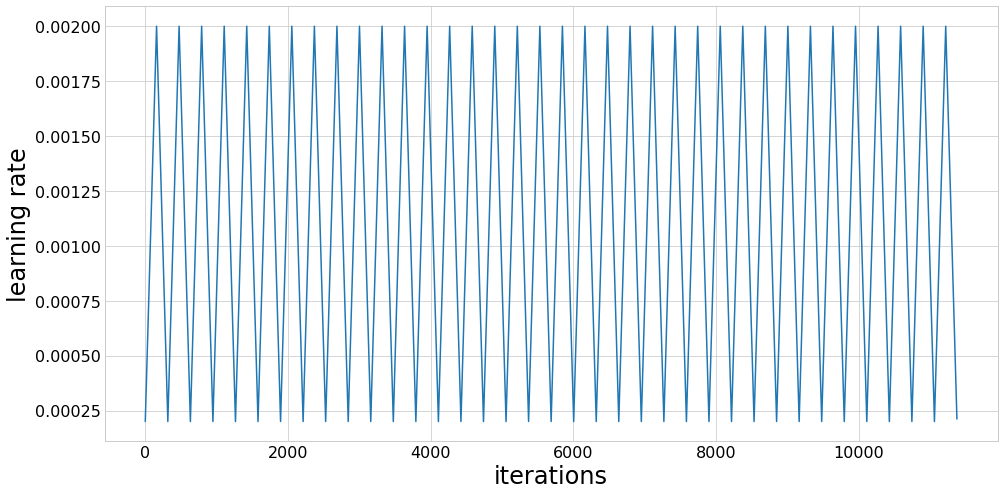

Fold took 249.201s

Training model 2 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.298930). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149825). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8365986477583644e-05
2 New best found: 3.538509636564413e-05
3 New best found: 3.389748007757589e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.316423671640223e-05, default loss 3.316423671640223e-05
Saving snapshot 1
4 New best found: 3.316423671640223e-05
5 swa loss 3.316423671640223e-05, default loss 3.3298954424390105e-05
5 New best found: 3.316423671640223e-05
6 swa loss 3.316423671640223e-05, default loss 3.324092253606068e-05
6 New best found: 3.316423671640223e-05
7 swa loss 3.316423671640223e-05, default loss 3.3049012407718694e-05
7 New best found: 3.3049012407718694e-05
model is 1 epochs old
8 swa loss 3.261074716574512e-05, default loss 3.2449120914679955e-05
Saving snapshot 2
8 New best found: 3.2449120914679955e-05
9 swa loss 3.261074716574512e-05, default loss 3.255620532872854e-05
10 swa loss 3.261074716574512e-05, default loss 3.441326919128187e-05
11 swa loss 3.261074716574512e-05, default loss 3.279313948878553e-05
model is 2 epochs old
12 s

87 swa loss 3.140971418470144e-05, default loss 3.22883122440544e-05
87 New best found: 3.140971418470144e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.140951320528984e-05, default loss 3.179653061524732e-05
Saving snapshot 22
88 New best found: 3.140951320528984e-05
89 swa loss 3.140951320528984e-05, default loss 3.1700270292640197e-05
89 New best found: 3.140951320528984e-05
90 swa loss 3.140951320528984e-05, default loss 3.2120836188551036e-05
90 New best found: 3.140951320528984e-05
91 swa loss 3.140951320528984e-05, default loss 3.1932748513645493e-05
91 New best found: 3.140951320528984e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.1405676434224004e-05, default loss 3.162434966361616e-05
Saving snapshot 23
92 New best found: 3.1405676434224004e-05
93 swa loss 3.1405676434224004e-05, default loss 3.148055007186485e-05
93 New best found: 3.1405676434224004e-05
94 swa loss 3.1405676434224004e-05, default loss 3.262196589203086e-05
94 New bes

161 swa loss 3.137927531497553e-05, default loss 3.1875465947086926e-05
162 swa loss 3.137927531497553e-05, default loss 3.204795484634815e-05
163 swa loss 3.137927531497553e-05, default loss 3.201364972919691e-05
model is 30 epochs old
new model is 5 epochs old
164 swa loss 3.138031530979788e-05, default loss 3.176459473615978e-05
Saving snapshot 41
Early stopping after 164 epochs
Score is: {'loss': 3.137112384865759e-05, 'wAUC': 0.061595257777111834, 'AUC': 0.0972319599060254, 'AMS': 4.004284715169787, 'cut': 0.9515761137008667}


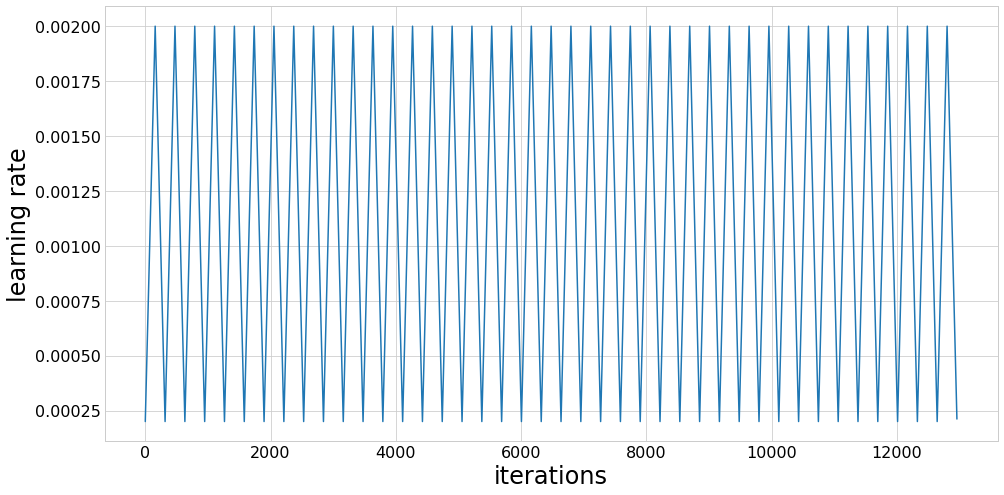

Fold took 286.356s

Training model 3 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.339338). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170074). Check your callbacks.
  % delta_t_median)


1 New best found: 3.941136798530352e-05
2 New best found: 3.5858042183099314e-05
3 New best found: 3.48231031675823e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.435747341427487e-05, default loss 3.435747341427487e-05
Saving snapshot 1
4 New best found: 3.435747341427487e-05
5 swa loss 3.435747341427487e-05, default loss 3.447555086459033e-05
5 New best found: 3.435747341427487e-05
6 swa loss 3.435747341427487e-05, default loss 3.460050052672159e-05
6 New best found: 3.435747341427487e-05
7 swa loss 3.435747341427487e-05, default loss 3.360118328564567e-05
7 New best found: 3.360118328564567e-05
model is 1 epochs old
8 swa loss 3.362334867124446e-05, default loss 3.326782846415881e-05
Saving snapshot 2
8 New best found: 3.326782846415881e-05
9 swa loss 3.362334867124446e-05, default loss 3.325510657596169e-05
9 New best found: 3.325510657596169e-05
10 swa loss 3.362334867124446e-05, default loss 3.384743020287715e-05
11 swa loss 3.362334867124446e-05, default loss 3.297154798201

84 swa loss 3.1852888799767243e-05, default loss 3.202898701565573e-05
Saving snapshot 21
84 New best found: 3.1852888799767243e-05
85 swa loss 3.1852888799767243e-05, default loss 3.223719066445483e-05
85 New best found: 3.1852888799767243e-05
86 swa loss 3.1852888799767243e-05, default loss 3.2792752418026796e-05
86 New best found: 3.1852888799767243e-05
87 swa loss 3.1852888799767243e-05, default loss 3.226110015675658e-05
87 New best found: 3.1852888799767243e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.1845475303998685e-05, default loss 3.200816947646672e-05
Saving snapshot 22
88 New best found: 3.1845475303998685e-05
89 swa loss 3.1845475303998685e-05, default loss 3.189301056554541e-05
89 New best found: 3.1845475303998685e-05
90 swa loss 3.1845475303998685e-05, default loss 3.262488539912738e-05
90 New best found: 3.1845475303998685e-05
91 swa loss 3.1845475303998685e-05, default loss 3.249148363101995e-05
91 New best found: 3.1845475303998685e-05
model is

157 swa loss 3.1786889173963575e-05, default loss 3.288090465648565e-05
158 swa loss 3.1786889173963575e-05, default loss 3.251783704617992e-05
159 swa loss 3.1786889173963575e-05, default loss 3.256320278014755e-05
model is 19 epochs old
new model is 9 epochs old
160 swa loss 3.1795632620196553e-05, default loss 3.2365693798783465e-05
Saving snapshot 40
Early stopping after 160 epochs
Score is: {'loss': 3.1764427181042265e-05, 'wAUC': 0.06357234552297175, 'AUC': 0.10288572378502003, 'AMS': 3.7679612970638883, 'cut': 0.9608446359634399}


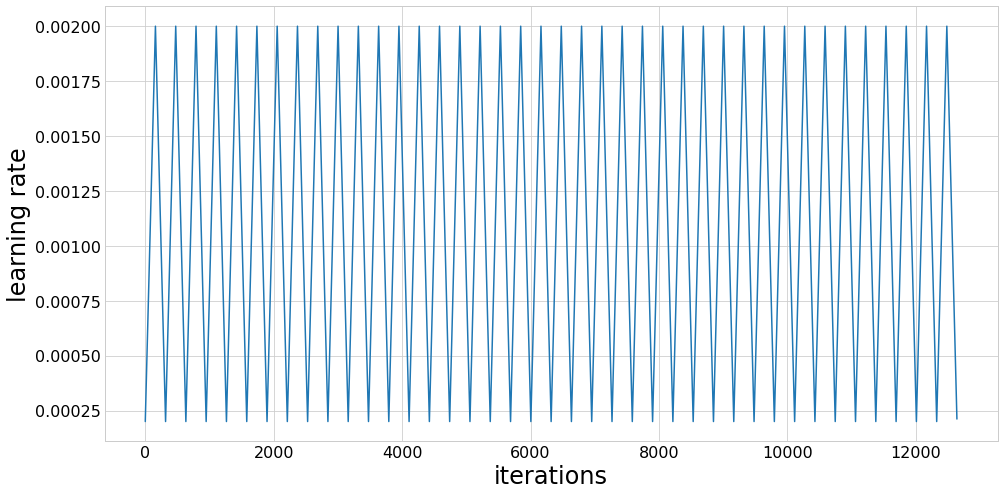

Fold took 285.810s

Training model 4 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.381296). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191148). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9498054254451165e-05
2 New best found: 3.637241010073176e-05
3 New best found: 3.4838379903330705e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.4097331820558466e-05, default loss 3.4097331820558466e-05
Saving snapshot 1
4 New best found: 3.4097331820558466e-05
5 swa loss 3.4097331820558466e-05, default loss 3.3543182469800656e-05
5 New best found: 3.3543182469800656e-05
6 swa loss 3.4097331820558466e-05, default loss 3.384678136379408e-05
7 swa loss 3.4097331820558466e-05, default loss 3.379296612907619e-05
model is 1 epochs old
8 swa loss 3.321996865915094e-05, default loss 3.2824124730396424e-05
Saving snapshot 2
8 New best found: 3.2824124730396424e-05
9 swa loss 3.321996865915094e-05, default loss 3.295553289352101e-05
10 swa loss 3.321996865915094e-05, default loss 3.3207611717408053e-05
11 swa loss 3.321996865915094e-05, default loss 3.3595182929378465e-05
model is 2 epochs old
12 swa loss 3.296084190810412e-05, default loss 3.2880083548852065e-05
Savin

86 swa loss 3.181382816237549e-05, default loss 3.2566322482591364e-05
86 New best found: 3.181382816237549e-05
87 swa loss 3.181382816237549e-05, default loss 3.2135238894480874e-05
87 New best found: 3.181382816237549e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.18107646986243e-05, default loss 3.2206130394245256e-05
Saving snapshot 22
88 New best found: 3.18107646986243e-05
89 swa loss 3.18107646986243e-05, default loss 3.199317216107377e-05
89 New best found: 3.18107646986243e-05
90 swa loss 3.18107646986243e-05, default loss 3.25312439571006e-05
90 New best found: 3.18107646986243e-05
91 swa loss 3.18107646986243e-05, default loss 3.2286572558039035e-05
91 New best found: 3.18107646986243e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.180766060307567e-05, default loss 3.1997529258182086e-05
Saving snapshot 23
92 New best found: 3.180766060307567e-05
93 swa loss 3.180766060307567e-05, default loss 3.217394459453285e-05
93 New best found: 3.

model is 28 epochs old
new model is 3 epochs old
156 swa loss 3.176784543154287e-05, default loss 3.219535762255266e-05
Saving snapshot 39
157 swa loss 3.176784543154287e-05, default loss 3.2339699030995845e-05
158 swa loss 3.176784543154287e-05, default loss 3.281699685365444e-05
159 swa loss 3.176784543154287e-05, default loss 3.234271866355104e-05
model is 29 epochs old
new model is 4 epochs old
160 swa loss 3.1767645811849306e-05, default loss 3.224132317308084e-05
Saving snapshot 40
161 swa loss 3.1767645811849306e-05, default loss 3.229700719943858e-05
162 swa loss 3.1767645811849306e-05, default loss 3.247550260424447e-05
163 swa loss 3.1767645811849306e-05, default loss 3.2315654885055904e-05
model is 30 epochs old
new model is 5 epochs old
164 swa loss 3.176682065089531e-05, default loss 3.2153466819483645e-05
Saving snapshot 41
165 swa loss 3.176682065089531e-05, default loss 3.228897684346013e-05
166 swa loss 3.176682065089531e-05, default loss 3.3177863203235424e-05
167 swa

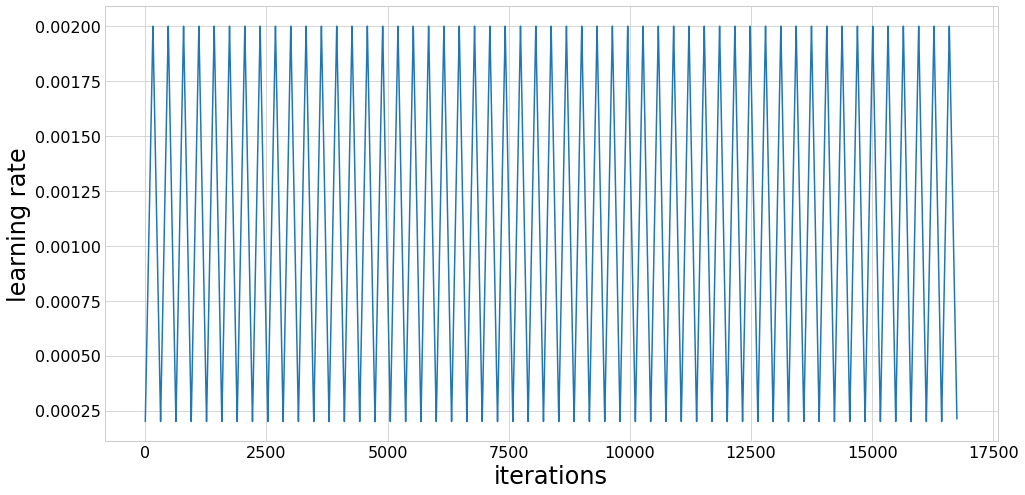

Fold took 386.035s

Training model 5 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.400486). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200728). Check your callbacks.
  % delta_t_median)


1 New best found: 3.950548798568883e-05
2 New best found: 3.541682098509719e-05
3 New best found: 3.411651294951811e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.357458490379488e-05, default loss 3.357458490379488e-05
Saving snapshot 1
4 New best found: 3.357458490379488e-05
5 swa loss 3.357458490379488e-05, default loss 3.356133479922594e-05
5 New best found: 3.356133479922594e-05
6 swa loss 3.357458490379488e-05, default loss 3.360066167464482e-05
7 swa loss 3.357458490379488e-05, default loss 3.3152839386802974e-05
7 New best found: 3.3152839386802974e-05
model is 1 epochs old
8 swa loss 3.298437640044598e-05, default loss 3.2711531016788496e-05
Saving snapshot 2
8 New best found: 3.2711531016788496e-05
9 swa loss 3.298437640044598e-05, default loss 3.286713018020215e-05
10 swa loss 3.298437640044598e-05, default loss 3.332535255981319e-05
11 swa loss 3.298437640044598e-05, default loss 3.3515311099869776e-05
model is 2 epochs old
12 swa loss 3.272289107970953e-05, default lo

87 swa loss 3.16935059451993e-05, default loss 3.198834284153656e-05
87 New best found: 3.16935059451993e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.168541777819073e-05, default loss 3.1922320409126975e-05
Saving snapshot 22
88 New best found: 3.168541777819073e-05
89 swa loss 3.168541777819073e-05, default loss 3.185569502126842e-05
89 New best found: 3.168541777819073e-05
90 swa loss 3.168541777819073e-05, default loss 3.208931986440264e-05
90 New best found: 3.168541777819073e-05
91 swa loss 3.168541777819073e-05, default loss 3.2129641249473473e-05
91 New best found: 3.168541777819073e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.1677595177268935e-05, default loss 3.195577074700346e-05
Saving snapshot 23
92 New best found: 3.1677595177268935e-05
93 swa loss 3.1677595177268935e-05, default loss 3.206064741215761e-05
93 New best found: 3.1677595177268935e-05
94 swa loss 3.1677595177268935e-05, default loss 3.25460636461154e-05
94 New best f

model is 28 epochs old
new model is 3 epochs old
156 swa loss 3.163824865911087e-05, default loss 3.2069908330726716e-05
Saving snapshot 39
157 swa loss 3.163824865911087e-05, default loss 3.1956506322795347e-05
158 swa loss 3.163824865911087e-05, default loss 3.218171643723396e-05
159 swa loss 3.163824865911087e-05, default loss 3.2161298798610304e-05
model is 29 epochs old
new model is 4 epochs old
160 swa loss 3.163640569792161e-05, default loss 3.203115522189284e-05
Saving snapshot 40
161 swa loss 3.163640569792161e-05, default loss 3.213829718395343e-05
162 swa loss 3.163640569792161e-05, default loss 3.2378951659809666e-05
163 swa loss 3.163640569792161e-05, default loss 3.253969274513622e-05
model is 30 epochs old
new model is 5 epochs old
164 swa loss 3.164047307616076e-05, default loss 3.220026830556801e-05
Saving snapshot 41
165 swa loss 3.164047307616076e-05, default loss 3.220547576603018e-05
166 swa loss 3.164047307616076e-05, default loss 3.223861091578032e-05
167 swa los

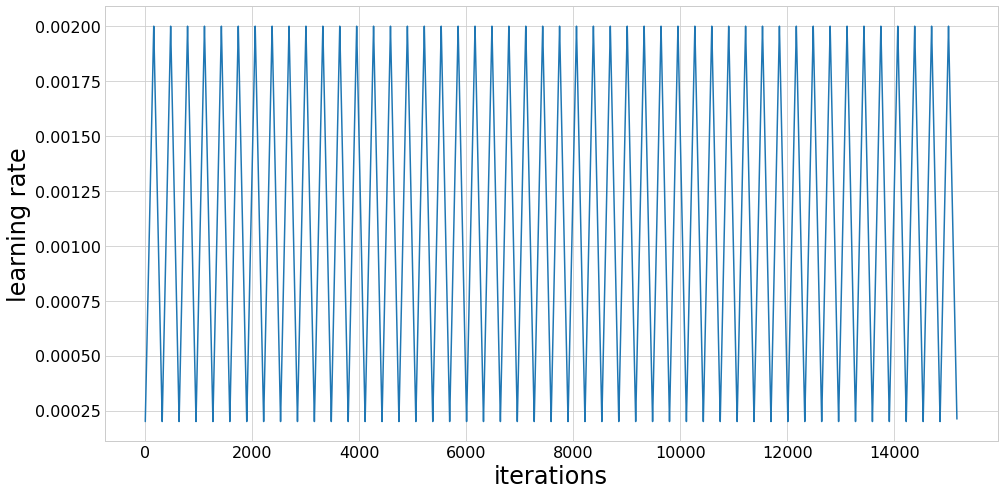

Fold took 352.896s

Training model 6 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.432180). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216577). Check your callbacks.
  % delta_t_median)


1 New best found: 3.82952971252962e-05
2 New best found: 3.454649333434645e-05
3 New best found: 3.373059252771782e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.334758022683673e-05, default loss 3.334758022683673e-05
Saving snapshot 1
4 New best found: 3.334758022683673e-05
5 swa loss 3.334758022683673e-05, default loss 3.3533497824100776e-05
5 New best found: 3.334758022683673e-05
6 swa loss 3.334758022683673e-05, default loss 3.33058472169796e-05
6 New best found: 3.33058472169796e-05
7 swa loss 3.334758022683673e-05, default loss 3.28380761333392e-05
7 New best found: 3.28380761333392e-05
model is 1 epochs old
8 swa loss 3.283911378239282e-05, default loss 3.2803354144562035e-05
Saving snapshot 2
8 New best found: 3.2803354144562035e-05
9 swa loss 3.283911378239282e-05, default loss 3.2716770355182236e-05
9 New best found: 3.2716770355182236e-05
10 swa loss 3.283911378239282e-05, default loss 3.348349119478371e-05
11 swa loss 3.283911378239282e-05, default loss 3.258524997509

model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.176580254657893e-05, new model: 3.167522695148364e-05
New model better, replacing
____________________


84 swa loss 3.167522695148364e-05, default loss 3.1646783342876006e-05
Saving snapshot 21
84 New best found: 3.1646783342876006e-05
85 swa loss 3.167522695148364e-05, default loss 3.171524440404028e-05
86 swa loss 3.167522695148364e-05, default loss 3.205527245881967e-05
87 swa loss 3.167522695148364e-05, default loss 3.198117129941238e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.166965389100369e-05, default loss 3.1875843420857564e-05
Saving snapshot 22
89 swa loss 3.166965389100369e-05, default loss 3.193198452354409e-05
90 swa loss 3.166965389100369e-05, default loss 3.237763076322153e-05
91 swa loss 3.166965389100369e-05, default loss 3.1968423225043806e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.1660197631572374e-05, default loss 3.18196663

model is 31 epochs old
new model is 6 epochs old
168 swa loss 3.166126915457426e-05, default loss 3.2279409206239505e-05
Saving snapshot 42
Early stopping after 168 epochs
Score is: {'loss': 3.164206392248161e-05, 'wAUC': 0.062466106169063895, 'AUC': 0.09860554344138828, 'AMS': 3.7772312268715607, 'cut': 0.9482196569442749}


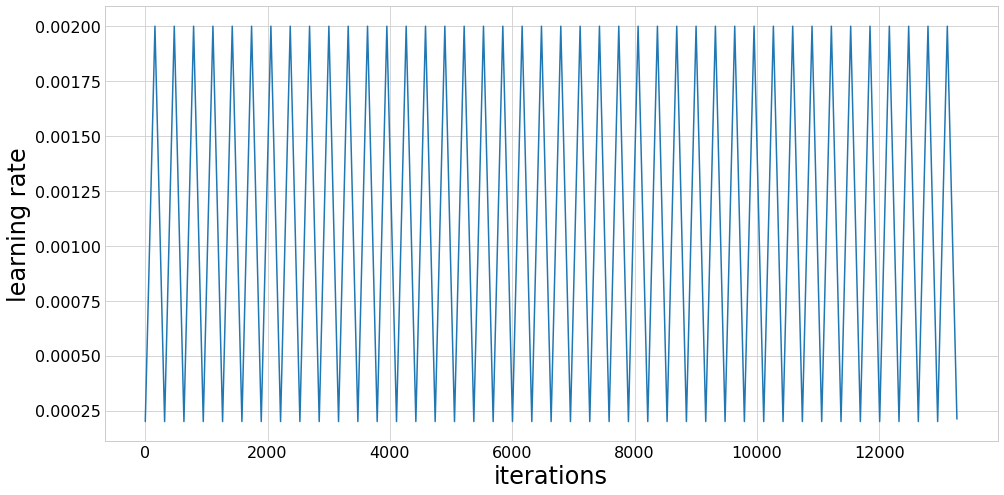

Fold took 313.662s

Training model 7 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.449020). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225053). Check your callbacks.
  % delta_t_median)


1 New best found: 3.898811327326762e-05
2 New best found: 3.6036260486097216e-05
3 New best found: 3.466092082314961e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.3917487447441386e-05, default loss 3.3917487447441386e-05
Saving snapshot 1
4 New best found: 3.3917487447441386e-05
5 swa loss 3.3917487447441386e-05, default loss 3.371839775871169e-05
5 New best found: 3.371839775871169e-05
6 swa loss 3.3917487447441386e-05, default loss 3.426797313448234e-05
7 swa loss 3.3917487447441386e-05, default loss 3.4471803854914066e-05
model is 1 epochs old
8 swa loss 3.32813831721848e-05, default loss 3.301724931827527e-05
Saving snapshot 2
8 New best found: 3.301724931827527e-05
9 swa loss 3.32813831721848e-05, default loss 3.322391136148953e-05
10 swa loss 3.32813831721848e-05, default loss 3.3356776605865286e-05
11 swa loss 3.32813831721848e-05, default loss 3.304907361990753e-05
model is 2 epochs old
12 swa loss 3.292341859309685e-05, default loss 3.2667136186338076e-05
Saving snapsho

87 swa loss 3.1699962888374295e-05, default loss 3.215591537081755e-05
87 New best found: 3.1699962888374295e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.170263247827547e-05, default loss 3.1953552056334746e-05
Saving snapshot 22
89 swa loss 3.170263247827547e-05, default loss 3.199653874669818e-05
90 swa loss 3.170263247827547e-05, default loss 3.18952323011542e-05
91 swa loss 3.170263247827547e-05, default loss 3.206844517365639e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.170114359937764e-05, default loss 3.192752034927389e-05
Saving snapshot 23
93 swa loss 3.170114359937764e-05, default loss 3.1891864719098514e-05
94 swa loss 3.170114359937764e-05, default loss 3.225767350994105e-05
95 swa loss 3.170114359937764e-05, default loss 3.229471317743426e-05
model is 13 epochs old
new model is 3 epochs old
96 swa loss 3.169198782894113e-05, default loss 3.1835770805756506e-05
Saving snapshot 24
96 New best found: 3.169198782894113e-05
97 swa los

Score is: {'loss': 3.160117612650981e-05, 'wAUC': 0.06221598671475248, 'AUC': 0.09485431683813883, 'AMS': 4.125220710121593, 'cut': 0.9856625199317932}


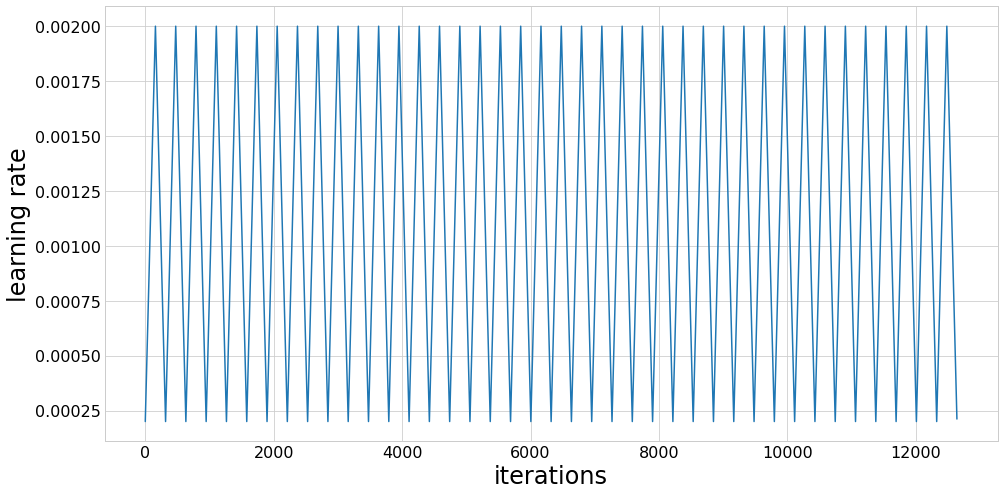

Fold took 308.437s

Training model 8 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.499438). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250352). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9478173811221496e-05
2 New best found: 3.5941514805017504e-05
3 New best found: 3.4631619120773394e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.401928849343676e-05, default loss 3.401928849343676e-05
Saving snapshot 1
4 New best found: 3.401928849343676e-05
5 swa loss 3.401928849343676e-05, default loss 3.357567410712363e-05
5 New best found: 3.357567410712363e-05
6 swa loss 3.401928849343676e-05, default loss 3.379753010376589e-05
7 swa loss 3.401928849343676e-05, default loss 3.30761117147631e-05
7 New best found: 3.30761117147631e-05
model is 1 epochs old
8 swa loss 3.322648347384529e-05, default loss 3.2891402652603575e-05
Saving snapshot 2
8 New best found: 3.2891402652603575e-05
9 swa loss 3.322648347384529e-05, default loss 3.317108866031049e-05
10 swa loss 3.322648347384529e-05, default loss 3.316398371971445e-05
11 swa loss 3.322648347384529e-05, default loss 3.2950549668748866e-05
model is 2 epochs old
12 swa loss 3.2912497500365136e-05, default lo

86 swa loss 3.158097537816502e-05, default loss 3.232140524050919e-05
86 New best found: 3.158097537816502e-05
87 swa loss 3.158097537816502e-05, default loss 3.178981108212611e-05
87 New best found: 3.158097537816502e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.1571504184103104e-05, default loss 3.177133579738438e-05
Saving snapshot 22
88 New best found: 3.1571504184103104e-05
89 swa loss 3.1571504184103104e-05, default loss 3.158645331131993e-05
89 New best found: 3.1571504184103104e-05
90 swa loss 3.1571504184103104e-05, default loss 3.197883440298028e-05
90 New best found: 3.1571504184103104e-05
91 swa loss 3.1571504184103104e-05, default loss 3.195836588129168e-05
91 New best found: 3.1571504184103104e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.1564190384233374e-05, default loss 3.171461901365547e-05
Saving snapshot 23
92 New best found: 3.1564190384233374e-05
93 swa loss 3.1564190384233374e-05, default loss 3.18088904270553e-05
93 New 

model is 18 epochs old
new model is 8 epochs old
156 swa loss 3.144993096357211e-05, default loss 3.1983998185023667e-05
Saving snapshot 39
157 swa loss 3.144993096357211e-05, default loss 3.2071180776983964e-05
158 swa loss 3.144993096357211e-05, default loss 3.2109844103979416e-05
159 swa loss 3.144993096357211e-05, default loss 3.1869898772856686e-05
model is 19 epochs old
new model is 9 epochs old
160 swa loss 3.144409119267948e-05, default loss 3.1728582001233006e-05
Saving snapshot 40
161 swa loss 3.144409119267948e-05, default loss 3.203222515294328e-05
162 swa loss 3.144409119267948e-05, default loss 3.2050245281425304e-05
163 swa loss 3.144409119267948e-05, default loss 3.22365235115285e-05
model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.1450232553470417e-05, new model: 3.147834097326267e-05
Current model better, renewing
____________________


164 swa loss 3.1450232553470417e-05, default loss 3.194556639136863e-05
Saving snapshot

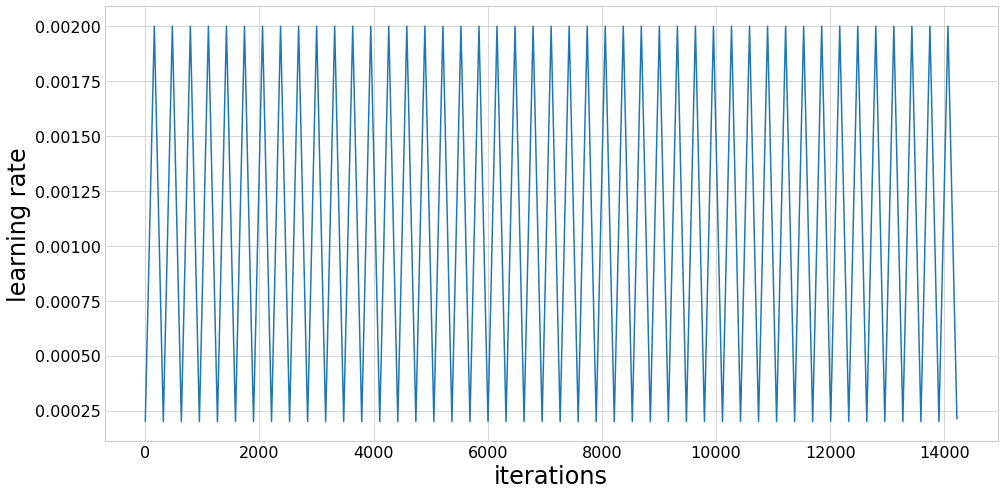

Fold took 352.525s

Training model 9 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.541684). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.271388). Check your callbacks.
  % delta_t_median)


1 New best found: 3.914709918711878e-05
2 New best found: 3.5415511243828236e-05
3 New best found: 3.508660165718999e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.3905195080580286e-05, default loss 3.3905195080580286e-05
Saving snapshot 1
4 New best found: 3.3905195080580286e-05
5 swa loss 3.3905195080580286e-05, default loss 3.3887796320782145e-05
5 New best found: 3.3887796320782145e-05
6 swa loss 3.3905195080580286e-05, default loss 3.4220388320175746e-05
7 swa loss 3.3905195080580286e-05, default loss 3.3418575383176066e-05
7 New best found: 3.3418575383176066e-05
model is 1 epochs old
8 swa loss 3.3364407572848004e-05, default loss 3.311830412887875e-05
Saving snapshot 2
8 New best found: 3.311830412887875e-05
9 swa loss 3.3364407572848004e-05, default loss 3.335648768834631e-05
10 swa loss 3.3364407572848004e-05, default loss 3.460356565323301e-05
11 swa loss 3.3364407572848004e-05, default loss 3.28780634513834e-05
11 New best found: 3.28780634513834e-05
model is 2 epochs

model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.175828790221325e-05, default loss 3.188255776772116e-05
Saving snapshot 22
88 New best found: 3.175828790221325e-05
89 swa loss 3.175828790221325e-05, default loss 3.214540980506446e-05
89 New best found: 3.175828790221325e-05
90 swa loss 3.175828790221325e-05, default loss 3.2506995505061323e-05
90 New best found: 3.175828790221325e-05
91 swa loss 3.175828790221325e-05, default loss 3.2031042631561976e-05
91 New best found: 3.175828790221325e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.174573208168822e-05, default loss 3.1872954424307005e-05
Saving snapshot 23
92 New best found: 3.174573208168822e-05
93 swa loss 3.174573208168822e-05, default loss 3.201706955725356e-05
93 New best found: 3.174573208168822e-05
94 swa loss 3.174573208168822e-05, default loss 3.22150483844911e-05
94 New best found: 3.174573208168822e-05
95 swa loss 3.174573208168822e-05, default loss 3.219670214522852e-05
95 New best fou

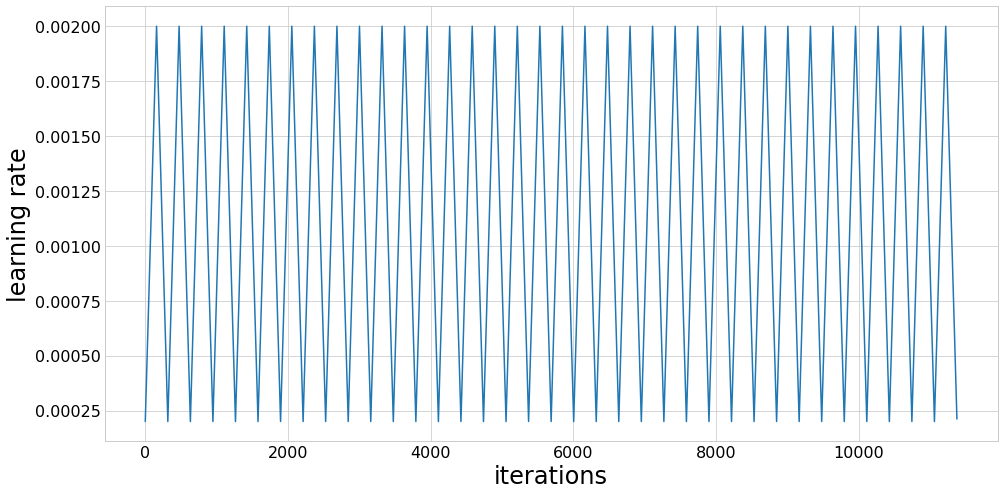

Fold took 290.503s

Training model 10 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.603532). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.302368). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8683480931062446e-05
2 New best found: 3.639946526324374e-05
3 New best found: 3.446444809094013e-05
SWA beginning
model is 0 epochs old
4 swa loss 3.375577045508725e-05, default loss 3.375577045508725e-05
Saving snapshot 1
4 New best found: 3.375577045508725e-05
5 swa loss 3.375577045508725e-05, default loss 3.362325337139034e-05
5 New best found: 3.362325337139034e-05
6 swa loss 3.375577045508725e-05, default loss 3.3919752148171855e-05
7 swa loss 3.375577045508725e-05, default loss 3.355048574918322e-05
7 New best found: 3.355048574918322e-05
model is 1 epochs old
8 swa loss 3.3230608138094155e-05, default loss 3.304874641294029e-05
Saving snapshot 2
8 New best found: 3.304874641294029e-05
9 swa loss 3.3230608138094155e-05, default loss 3.28454075320906e-05
9 New best found: 3.28454075320906e-05
10 swa loss 3.3230608138094155e-05, default loss 3.3847974124506736e-05
11 swa loss 3.3230608138094155e-05, default loss 3.2983558200329146e-05
model is 2 epochs old
12 s

87 swa loss 3.194506555287378e-05, default loss 3.2808139772767655e-05
87 New best found: 3.194506555287378e-05
model is 11 epochs old
new model is 1 epochs old
88 swa loss 3.194299851158073e-05, default loss 3.21500447146717e-05
Saving snapshot 22
88 New best found: 3.194299851158073e-05
89 swa loss 3.194299851158073e-05, default loss 3.232953043028049e-05
89 New best found: 3.194299851158073e-05
90 swa loss 3.194299851158073e-05, default loss 3.2481626630131766e-05
90 New best found: 3.194299851158073e-05
91 swa loss 3.194299851158073e-05, default loss 3.234824217654073e-05
91 New best found: 3.194299851158073e-05
model is 12 epochs old
new model is 2 epochs old
92 swa loss 3.1935771858320557e-05, default loss 3.207826535461919e-05
Saving snapshot 23
92 New best found: 3.1935771858320557e-05
93 swa loss 3.1935771858320557e-05, default loss 3.226383715737535e-05
93 New best found: 3.1935771858320557e-05
94 swa loss 3.1935771858320557e-05, default loss 3.261389879594177e-05
94 New best

153 swa loss 3.190417323328095e-05, default loss 3.2283962956929e-05
153 New best found: 3.190417323328095e-05
154 swa loss 3.190417323328095e-05, default loss 3.239815880062087e-05
154 New best found: 3.190417323328095e-05
155 swa loss 3.190417323328095e-05, default loss 3.220550412799035e-05
155 New best found: 3.190417323328095e-05
model is 28 epochs old
new model is 3 epochs old
156 swa loss 3.1902197854264724e-05, default loss 3.222678436887415e-05
Saving snapshot 39
156 New best found: 3.1902197854264724e-05
157 swa loss 3.1902197854264724e-05, default loss 3.222180370930102e-05
157 New best found: 3.1902197854264724e-05
158 swa loss 3.1902197854264724e-05, default loss 3.31445709934635e-05
158 New best found: 3.1902197854264724e-05
159 swa loss 3.1902197854264724e-05, default loss 3.261437218131714e-05
159 New best found: 3.1902197854264724e-05
model is 29 epochs old
new model is 4 epochs old
160 swa loss 3.1904619097152915e-05, default loss 3.237149902131853e-05
Saving snapshot

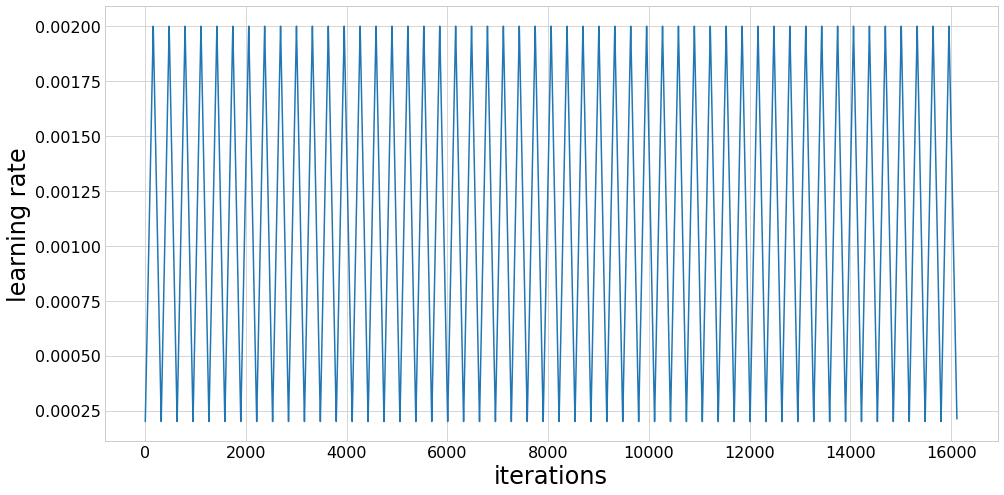

Fold took 419.290s


______________________________________
Training finished
Cross-validation took 3244.933s 


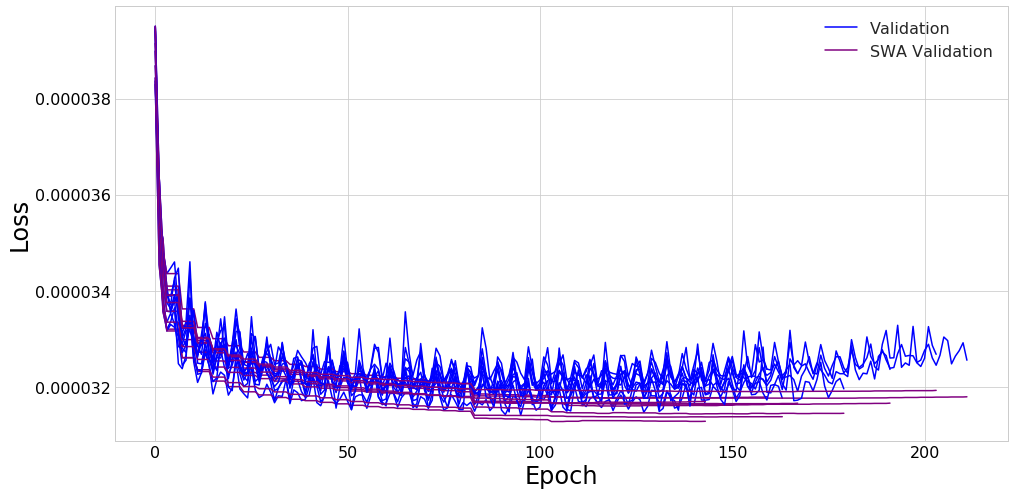

Mean loss = 3.161e-05 +- 6e-08
Mean wAUC = 0.0626 +- 0.0002
Mean AUC = 0.0975 +- 0.0007
Mean AMS = 3.89 +- 0.04
Mean cut = 0.958 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [10]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
%%capture --no-stdout
ensemble, weights = assemble_ensemble(results, ensemble_size, metric=ensemble_mode)

Choosing ensemble by loss
Model 0 is 0 with loss = 3.1279739910780984e-05
Model 1 is 1 with loss = 3.137112384865759e-05
Model 2 is 7 with loss = 3.1437207537237555e-05
Model 3 is 6 with loss = 3.160117612650981e-05
Model 4 is 4 with loss = 3.16362287678708e-05
Model 5 is 5 with loss = 3.164206392248161e-05
Model 6 is 8 with loss = 3.166391587163533e-05
Model 7 is 2 with loss = 3.1764427181042265e-05
Model 8 is 3 with loss = 3.176516581048267e-05
Model 9 is 9 with loss = 3.190161991560863e-05


## Response on validation data without TTA

In [12]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [13]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0016228732369840146s per sample

Predicting fold 2 out of 10
Prediction took 0.00033867926448583605s per sample

Predicting fold 3 out of 10
Prediction took 0.00033952920883893967s per sample

Predicting fold 4 out of 10
Prediction took 0.000339153566211462s per sample

Predicting fold 5 out of 10
Prediction took 0.000352797344326973s per sample

Predicting fold 6 out of 10
Prediction took 0.0003415842764079571s per sample

Predicting fold 7 out of 10
Prediction took 0.0003452603258192539s per sample

Predicting fold 8 out of 10
Prediction took 0.00033872985616326335s per sample

Predicting fold 9 out of 10
Prediction took 0.00033825972601771355s per sample

Predicting fold 10 out of 10
Prediction took 0.0003385455764830112s per sample



In [14]:
val_df = convert_to_df(val_fy.source)

50000 candidates loaded


In [15]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

Testing ROC AUC: unweighted 0.9041213298121894, weighted 0.9362685229070609


Best cut at 0.964594359393115 corresponds to AMS of 3.9019662988581296
Maximum AMS for data is 3.937850581684784 at cut of 0.9658679366111755
CPU times: user 27.8 s, sys: 0 ns, total: 27.8 s
Wall time: 27.8 s


/home/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


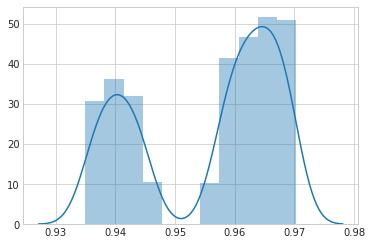

In [16]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.95552635 corresponds to AMS of 3.7778339520836415
Maximum AMS for data is 3.937850581684784 at cut of 0.9658679366111755
CPU times: user 99.6 ms, sys: 0 ns, total: 99.6 ms
Wall time: 97.5 ms


/home/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


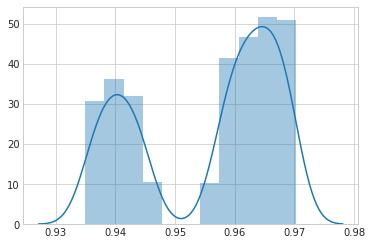

In [17]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [18]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [19]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00034445911225947464s per sample

Predicting fold 2 out of 10
Prediction took 0.0003446064653721723s per sample

Predicting fold 3 out of 10
Prediction took 0.00034830579832196234s per sample

Predicting fold 4 out of 10
Prediction took 0.00034925813268531453s per sample

Predicting fold 5 out of 10
Prediction took 0.000352287841994654s per sample

Predicting fold 6 out of 10
Prediction took 0.00035046062943610277s per sample

Predicting fold 7 out of 10
Prediction took 0.000345845551924272s per sample

Predicting fold 8 out of 10
Prediction took 0.00034530930187214503s per sample

Predicting fold 9 out of 10
Prediction took 0.0003438274233178659s per sample

Predicting fold 10 out of 10
Prediction took 0.0003447459931400689s per sample

CPU times: user 3min 27s, sys: 14.4 s, total: 3min 41s
Wall time: 3min 10s


In [20]:
score_test_data(test_fy.source, cut_kde)

Public:Private AMS: 3.6350469372434695 : 3.693407015611018


(3.6350469372434695, 3.693407015611018)

In [21]:
score_test_data(test_fy.source, cut_mean)

Public:Private AMS: 3.7549487336228506 : 3.7857534893380107


(3.7549487336228506, 3.7857534893380107)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)